In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
#import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

duke_data = pd.read_csv("Data/attitudes_clean2.csv")

<function matplotlib.pyplot.show(*args, **kw)>

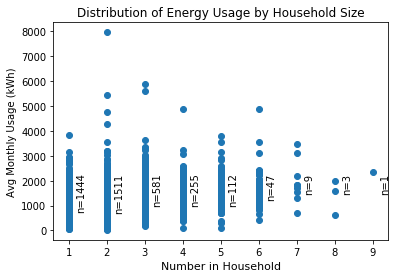

In [2]:
# Create a scatterplot to show energy usage by number in household

# Create df with with household number, then dfs for x and y axes
hhnum_df = duke_data[duke_data["SAMPLE_HHPEOPLE"] != 0]
y = hhnum_df["SAMPLE_USAGE"]
x = hhnum_df["SAMPLE_HHPEOPLE"]

# Create scatterplot and add labels and legend
plt.scatter(x,y)
plt.title("Distribution of Energy Usage by Household Size")
plt.xlabel('Number in Household', size = 11)
plt.ylabel("Avg Monthly Usage (kWh)")

# Tack on the group sample sizes (n=#) at the bottom of the bars
hhnum_group_counts = hhnum_df.groupby(str('SAMPLE_HHPEOPLE')).size()
for i in range(len(hhnum_group_counts)):
    plt.text(x = i + 1.2 , y = 2000, s = "n=" + str(hhnum_group_counts.iloc[i]), size = 10, rotation = "90")

plt.savefig("Usage_by_HHnum.png",bbox_inches="tight")
plt.show

In [3]:
# Create the label list for all bar charts legends
attitude_legend = ["Greenness", "Conserver", "First Adopter"]
yheight = 0.4 #for placement of "n=#" values on each bar chart

# Switch from the default color order so that Greenness is green, not blue)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
attitude_colors = [colors[2], colors[1], colors[0]]

C:\Users\MainUser\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

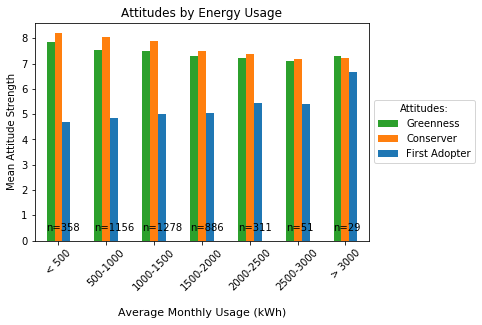

In [4]:
# Create a bar chart to display the strengths of the three attitudes by energy usage

# From read-in data, create a df with desired fields
x = duke_data[["SAMPLE_USAGE","greenness","conserver","firstadopter"]]

# Create energy usage bins and group names, then slice the data into the bins
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 9000]
group_names = ['< 500', "500-1000", "1000-1500","1500-2000","2000-2500","2500-3000", "> 3000"]
x["usage_bins"] = pd.cut(x["SAMPLE_USAGE"], bins, labels = group_names)

# Create a df indexed by energy usage
y = x.set_index('SAMPLE_USAGE')

# Get average attitude strengths per binned energy usage group
chart_df = y.groupby('usage_bins').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color=attitude_colors)
plt.title("Attitudes by Energy Usage")
plt.xlabel('Average Monthly Usage (kWh)', size = 11)
plt.ylabel('Mean Attitude Strength')
chart.set_xticklabels(group_names, rotation = 45)
chart.xaxis.labelpad = 15
chart.legend(loc='center left', title = "Attitudes:", labels=attitude_legend, bbox_to_anchor=(1, 0.5))

# Tack on the group sample sizes (n=#) at the bottom of the bars
usage_groups_counts = x.groupby([pd.cut(x['SAMPLE_USAGE'], bins)]).count()
for i in range(len(usage_groups_counts)):
    plt.text(x = i-.25 , y = yheight, s = "n=" + str(usage_groups_counts.iloc[i][1]), size = 10)

plt.savefig("Bar_Attitudes_by_Usage.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

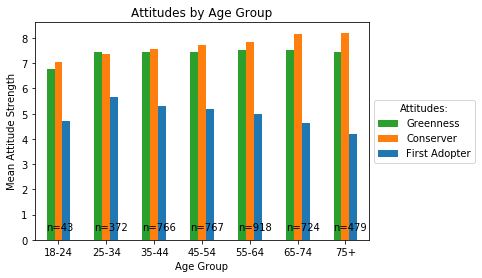

In [5]:
# Create a bar chart to display the strengths of the three attitudes across age groups.

# From read-in data, create new df with desired fields, then a df indexed by age indicator
x = duke_data[["age","greenness","conserver","firstadopter"]]
y = x.set_index('age')

# Get average attitude strengths per age group
chart_df = y.groupby('age').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color=attitude_colors)
plt.xlabel('Age Group')
plt.ylabel('Mean Attitude Strength')
plt.title('Attitudes by Age Group')
age_labels = ["18-24","25-34","35-44","45-54","55-64","65-74","75+"]
chart.set_xticklabels(age_labels, rotation = "horizontal")
chart.legend(loc='center left', title = "Attitudes:", labels=attitude_legend, \
             bbox_to_anchor=(1, 0.5))

# Tack on the group sample sizes (n=#) at the bottom of the bars
age_groups_counts = y.groupby(str('age')).size()
for i in range(len(age_groups_counts)):
    plt.text(x = i-.25 , y = yheight, s = "n=" + str(age_groups_counts.iloc[i]), size = 10)

plt.savefig("Bar_Attitudes_by_Age.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

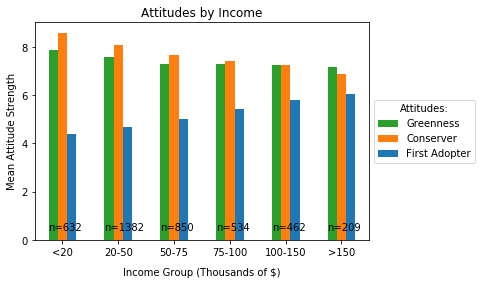

In [6]:
# Create a bar chart to display the strengths of the three attitudes across income groups.

# From read-in data, create a df with desired fields, then a df indexed by income level
x = duke_data[["income","greenness","conserver","firstadopter"]]
y = x.set_index('income')

# Get average attitude strengths per income group
chart_df = y.groupby('income').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color = attitude_colors)
plt.title("Attitudes by Income")
plt.xlabel('Income Group (Thousands of $)')
plt.ylabel('Mean Attitude Strength')
income_labels = ["<20","20-50","50-75","75-100","100-150",">150"]
chart.set_xticklabels(income_labels, rotation = "horizontal")
chart.xaxis.labelpad = 10
chart.legend(loc='center left', title = "Attitudes:",labels = attitude_legend, bbox_to_anchor=(1, 0.5))

# Tack on the group sample sizes (n=#) at the bottom of the bars
income_group_counts = y.groupby(str('income')).size()
for i in range(len(income_group_counts)):
    plt.text(x = i-.25 , y = yheight, s = "n=" + str(income_group_counts.iloc[i]), size = 10)

plt.savefig("Bar_Attitudes_by_Income.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

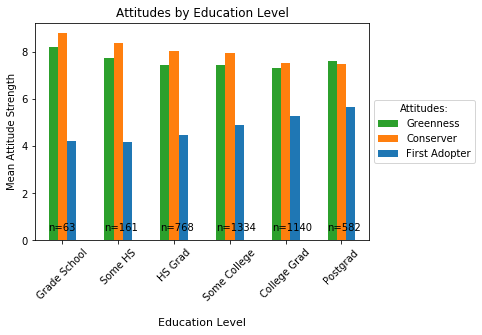

In [7]:
# Create a bar chart to display the strengths of the three attitudes by education levels.

# From read-in data, create a df with desired fields, then a df indexed by educ indicator
x = duke_data[["educ","greenness","conserver","firstadopter"]]
y = x.set_index('educ')

# Get average attitude strengths per age group
chart_df = y.groupby('educ').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color = attitude_colors)
plt.title("Attitudes by Education Level", size = 12)
plt.xlabel('Education Level', size = 11)
plt.ylabel('Mean Attitude Strength')
income_labels = ["Grade School","Some HS","HS Grad","Some College","College Grad","Postgrad"]
chart.set_xticklabels(income_labels, size = 10, rotation = 45)
chart.xaxis.labelpad = 15
chart.legend(loc='center left', title = "Attitudes:", labels = attitude_legend, bbox_to_anchor=(1, 0.5))
title = "Attitudes:", 
# Tack on the group sample sizes (n=#) at the bottom of the bars
educ_group_counts = y.groupby(str('educ')).size()
for i in range(len(educ_group_counts)):
    plt.text(x = i-.25 , y = yheight, s = "n=" + str(educ_group_counts.iloc[i]), size = 10)

plt.savefig("Bar_Attitudes_by_Education.png",bbox_inches="tight")
plt.show

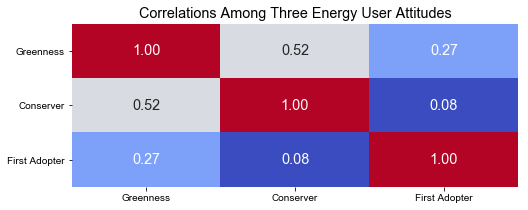

In [8]:
# Create a simple table displaying correlations among the three attitudes
corr_df = duke_data[["greenness","conserver","firstadopter"]]
corr_df.columns = ["Greenness","Conserver","First Adopter"]

fig, ax = plt.subplots(figsize=(8, 3))
sns.set(font_scale=1.2)
sns.heatmap(corr_df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

ax.set_title("Correlations Among Three Energy User Attitudes", color = "black")

ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal", color = "black")
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal", color = "black")

plt.savefig('CorrelationAttitudes.png', bbox_inches='tight')